## Compare Python version of regression deconvolution code to Matlab outputs

Import required packages:

In [49]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import Image, display

Define 'fixdata' function, which removes outliers from input datasets: 

In [50]:
def fixdata(x, jump):
    delta = np.concatenate([np.zeros(1), np.diff(x)])
    delta[np.abs(delta)>jump] = 0.
    y = x[0]+np.cumsum(delta)
    return y

Set default plotting parameters:

In [51]:
mpl.rcParams.update(mpl.rcParamsDefault)
mpl.rcParams[ 'font.size'        ] = 10
mpl.rcParams[ 'mathtext.default' ] = 'regular'          
mpl.rcParams[ 'xtick.direction'  ] = 'out'
mpl.rcParams[ 'ytick.direction'  ] = 'out'       
mpl.rcParams[ 'lines.linewidth'  ] = 1.0     

Define Earth tide parameters:

In [52]:
tide   = ['O$_1$   ', 'P$_1$   ', 'S$_1$   ', 'K$_1$   ', '$\phi_1$',
          '$\psi_1$', 'N$_2$   ', 'M$_2$   ', 'S$_2$   ', 'K$_2$   ']
period = [  25.819,   24.066,   24.000,   23.934,   23.869, 
            23.804,   12.658,   12.421,   12.000,   11.967]
p      = np.array(period) 
NP     = len(p)
omega  = 2.*np.pi/p

Compare Python arrays to Matlab versions:

In [53]:
print('p:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/p.arr'), p):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

p:

        Matlab        Python       % Error
  2.581900e+01  2.581900e+01  0.000000e+00
  2.406600e+01  2.406600e+01  0.000000e+00
  2.400000e+01  2.400000e+01  0.000000e+00
  2.393400e+01  2.393400e+01  0.000000e+00
  2.386900e+01  2.386900e+01  0.000000e+00
  2.380400e+01  2.380400e+01  0.000000e+00
  1.265800e+01  1.265800e+01  0.000000e+00
  1.242100e+01  1.242100e+01  0.000000e+00
  1.200000e+01  1.200000e+01  0.000000e+00
  1.196700e+01  1.196700e+01  0.000000e+00


In [55]:
print('omega:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/omega.arr'), omega):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

omega:

        Matlab        Python       % Error
  2.433551e-01  2.433551e-01 -3.138601e-07
  2.610814e-01  2.610814e-01  5.328183e-06
  2.617994e-01  2.617994e-01 -4.660381e-06
  2.625213e-01  2.625213e-01  8.164324e-06
  2.632362e-01  2.632362e-01  7.152099e-06
  2.639550e-01  2.639550e-01  7.753705e-06
  4.963806e-01  4.963806e-01 -5.214241e-06
  5.058518e-01  5.058518e-01  1.581675e-06
  5.235988e-01  5.235988e-01 -4.660381e-06
  5.250426e-01  5.250426e-01  8.164324e-06


Import groundwater pressure data:

In [56]:
name = '18830'
data = np.loadtxt('titree1.txt', delimiter='\t')
k  = range(30-1, len(data))
t1 = data[k,0]+693960.
w1 = data[k,1]          
T1 = data[k,2]          
w1 = fixdata(w1, 0.3)

Import barometric pressure data:

In [57]:
data = np.loadtxt('titree2.txt', delimiter='\t')
k  = range(20-1, len(data))
t2 = data[k,0]+693960.
T2 = data[k,1]
h2 = data[k,2]
bp = data[k,3]
bp = fixdata(bp, 1.)
w2 = fixdata(h2-bp, 1.) # convert to gauge pressure
bp = bp-1033.227 # subtract mean air pressure

Calculate temporal derivatives:

In [58]:
dt = 1./24.
t  = np.arange(t2[0], t2[-1]+dt, dt)
y  = np.interp(t, t1, w1)
x  = np.interp(t, t2, bp) 
dx = np.diff(x)/dt
dy = np.diff(y)/dt

Compare Python arrays to Matlab versions:

In [60]:
print('t:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/t.arr'), t):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

t:

        Matlab        Python       % Error
  7.353330e+05  7.353330e+05 -5.666820e-06
  7.353330e+05  7.353330e+05 -4.533075e-10
  7.353330e+05  7.353330e+05  5.665914e-06
  7.353331e+05  7.353331e+05 -2.267000e-06
  7.353331e+05  7.353331e+05  3.399366e-06
  7.353332e+05  7.353332e+05 -4.533546e-06
  7.353332e+05  7.353332e+05  1.132820e-06
  7.353332e+05  7.353332e+05  6.799185e-06
  7.353333e+05  7.353333e+05 -1.133726e-06
  7.353333e+05  7.353333e+05  4.532638e-06
  7.353334e+05  7.353334e+05 -3.400272e-06
  7.353334e+05  7.353334e+05  2.266092e-06
  7.353335e+05  7.353335e+05 -5.666817e-06
  7.353335e+05  7.353335e+05 -4.533706e-10
  7.353335e+05  7.353335e+05  5.665910e-06
  7.353336e+05  7.353336e+05 -2.266998e-06
  7.353336e+05  7.353336e+05  3.399364e-06
  7.353337e+05  7.353337e+05 -4.533543e-06
  7.353337e+05  7.353337e+05  1.132819e-06
  7.353337e+05  7.353337e+05  6.799181e-06
  7.353338e+05  7.353338e+05 -1.133726e-06
  7.353338e+05  7.353338e+05  4.532635e-06
  7.353

  7.353962e+05  7.353962e+05  6.798595e-06
  7.353963e+05  7.353963e+05 -1.133637e-06
  7.353963e+05  7.353963e+05  4.532242e-06
  7.353964e+05  7.353964e+05 -3.399988e-06
  7.353964e+05  7.353964e+05  2.265890e-06
  7.353965e+05  7.353965e+05 -5.666339e-06
  7.353965e+05  7.353965e+05 -4.613102e-10
  7.353965e+05  7.353965e+05  5.665416e-06
  7.353966e+05  7.353966e+05 -2.266812e-06
  7.353966e+05  7.353966e+05  3.399065e-06
  7.353967e+05  7.353967e+05 -4.533162e-06
  7.353967e+05  7.353967e+05  1.132714e-06
  7.353967e+05  7.353967e+05  6.798590e-06
  7.353968e+05  7.353968e+05 -1.133636e-06
  7.353968e+05  7.353968e+05  4.532239e-06
  7.353969e+05  7.353969e+05 -3.399986e-06
  7.353969e+05  7.353969e+05  2.265889e-06
  7.353970e+05  7.353970e+05 -5.666335e-06
  7.353970e+05  7.353970e+05 -4.613732e-10
  7.353970e+05  7.353970e+05  5.665413e-06
  7.353971e+05  7.353971e+05 -2.266811e-06
  7.353971e+05  7.353971e+05  3.399062e-06
  7.353972e+05  7.353972e+05 -4.533159e-06
  7.353972e

  7.354587e+05  7.354587e+05  6.798009e-06
  7.354588e+05  7.354588e+05 -1.133549e-06
  7.354588e+05  7.354588e+05  4.531849e-06
  7.354589e+05  7.354589e+05 -3.399707e-06
  7.354589e+05  7.354589e+05  2.265690e-06
  7.354590e+05  7.354590e+05 -5.665865e-06
  7.354590e+05  7.354590e+05 -4.691854e-10
  7.354590e+05  7.354590e+05  5.664927e-06
  7.354591e+05  7.354591e+05 -2.266627e-06
  7.354591e+05  7.354591e+05  3.398768e-06
  7.354592e+05  7.354592e+05 -4.532785e-06
  7.354592e+05  7.354592e+05  1.132610e-06
  7.354592e+05  7.354592e+05  6.798004e-06
  7.354593e+05  7.354593e+05 -1.133548e-06
  7.354593e+05  7.354593e+05  4.531846e-06
  7.354594e+05  7.354594e+05 -3.399705e-06
  7.354594e+05  7.354594e+05  2.265688e-06
  7.354595e+05  7.354595e+05 -5.665862e-06
  7.354595e+05  7.354595e+05 -4.692484e-10
  7.354595e+05  7.354595e+05  5.664923e-06
  7.354596e+05  7.354596e+05 -2.266626e-06
  7.354596e+05  7.354596e+05  3.398766e-06
  7.354597e+05  7.354597e+05 -4.532782e-06
  7.354597e

In [61]:
print('x:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/x.arr'), x):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

x:

        Matlab        Python       % Error
 -4.888722e+01 -4.888722e+01 -6.136573e-06
 -4.896643e+01 -4.896643e+01 -9.164211e-06
 -4.945555e+01 -4.945555e+01 -2.748362e-07
 -4.961158e+01 -4.961158e+01  6.043060e-06
 -4.976079e+01 -4.976079e+01  7.884913e-06
 -4.998165e+01 -4.998165e+01 -8.251444e-06
 -4.978450e+01 -4.978450e+01 -1.003485e-05
 -4.935370e+01 -4.935370e+01  9.373660e-06
 -4.908702e+01 -4.908702e+01  6.352656e-06
 -4.847816e+01 -4.847816e+01  8.498695e-09
 -4.828885e+01 -4.828885e+01 -5.800738e-06
 -4.840001e+01 -4.840001e+01 -1.678222e-06
 -4.870423e+01 -4.870423e+01  8.193297e-06
 -4.964925e+01 -4.964925e+01 -4.960000e-06
 -5.132677e+01 -5.132677e+01 -8.374872e-06
 -5.227351e+01 -5.227351e+01 -1.957286e-06
 -5.279625e+01 -5.279625e+01  4.519446e-06
 -5.319418e+01 -5.319418e+01  8.544262e-07
 -5.315852e+01 -5.315852e+01 -1.890557e-06
 -5.290328e+01 -5.290328e+01  7.306339e-06
 -5.178377e+01 -5.178377e+01  2.328327e-06
 -5.090364e+01 -5.090364e+01 -7.828361e-06
 -4.989

 -5.052876e+01 -5.052876e+01 -2.939990e-06
 -4.992982e+01 -4.992983e+01  1.006568e-05
 -4.935485e+01 -4.935485e+01 -6.851026e-06
 -4.930978e+01 -4.930978e+01  8.762728e-06
 -5.014082e+01 -5.014082e+01  4.449337e-06
 -5.087775e+01 -5.087775e+01  3.755337e-06
 -5.189671e+01 -5.189671e+01 -2.872658e-06
 -5.308382e+01 -5.308382e+01  4.149822e-06
 -5.392173e+01 -5.392173e+01  4.413601e-06
 -5.451980e+01 -5.451980e+01 -3.317052e-06
 -5.416782e+01 -5.416782e+01  7.610104e-06
 -5.375488e+01 -5.375488e+01 -9.399603e-07
 -5.307192e+01 -5.307192e+01 -9.554594e-07
 -5.260082e+01 -5.260083e+01  1.014506e-05
 -5.245081e+01 -5.245081e+01 -9.236426e-07
 -5.215689e+01 -5.215689e+01  2.735806e-06
 -5.204782e+01 -5.204782e+01  7.334155e-06
 -5.225376e+01 -5.225376e+01  4.433892e-06
 -5.279072e+01 -5.279072e+01 -1.614442e-06
 -5.306782e+01 -5.306782e+01  7.475726e-06
 -5.321386e+01 -5.321386e+01 -4.033456e-06
 -5.307484e+01 -5.307484e+01 -4.615417e-06
 -5.343182e+01 -5.343182e+01  7.486176e-06
 -5.375179e

 -5.030055e+01 -5.030055e+01 -2.938687e-06
 -5.083865e+01 -5.083864e+01 -1.130856e-05
 -5.129392e+01 -5.129391e+01 -1.046515e-05
 -5.087422e+01 -5.087422e+01  7.446167e-06
 -5.073711e+01 -5.073711e+01  2.126669e-07
 -5.003270e+01 -5.003270e+01 -3.684510e-06
 -4.924892e+01 -4.924892e+01  7.240966e-07
 -4.851575e+01 -4.851576e+01  1.387549e-05
 -4.747680e+01 -4.747681e+01  1.266205e-05
 -4.686226e+01 -4.686226e+01  1.709418e-06
 -4.692599e+01 -4.692599e+01 -3.014090e-06
 -4.716934e+01 -4.716934e+01 -5.096626e-06
 -4.773207e+01 -4.773207e+01 -4.897650e-06
 -4.831107e+01 -4.831106e+01 -1.251261e-05
 -4.851979e+01 -4.851979e+01 -4.386642e-06
 -4.847493e+01 -4.847493e+01 -1.019970e-06
 -4.805847e+01 -4.805847e+01  3.274132e-06
 -4.744757e+01 -4.744757e+01  3.048445e-06
 -4.669264e+01 -4.669264e+01  7.840134e-06
 -4.645155e+01 -4.645155e+01  7.556410e-06
 -4.598477e+01 -4.598477e+01 -2.064721e-06
 -4.681032e+01 -4.681031e+01 -1.672447e-05
 -4.735243e+01 -4.735243e+01 -6.058682e-06
 -4.878359e

In [62]:
print('y:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/y.arr'), y):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

y:

        Matlab        Python       % Error
  1.576227e+02  1.576227e+02  2.664591e-05
  1.576593e+02  1.576593e+02 -1.073408e-05
  1.576335e+02  1.576335e+02  3.115976e-05
  1.576948e+02  1.576948e+02 -3.804926e-06
  1.576593e+02  1.576593e+02 -7.078237e-06
  1.576647e+02  1.576647e+02 -8.159253e-06
  1.576834e+02  1.576834e+02  1.648867e-05
  1.576151e+02  1.576151e+02  2.123132e-05
  1.576058e+02  1.576058e+02 -1.554729e-05
  1.575984e+02  1.575984e+02  2.538136e-06
  1.575912e+02  1.575912e+02  1.634718e-06
  1.576260e+02  1.576260e+02  2.057174e-05
  1.576629e+02  1.576629e+02  1.902533e-06
  1.576629e+02  1.576629e+02  1.902794e-06
  1.577827e+02  1.577827e+02 -2.165310e-05
  1.578677e+02  1.578677e+02  2.343659e-05
  1.579248e+02  1.579248e+02 -9.222525e-06
  1.579303e+02  1.579303e+02  1.780137e-05
  1.578712e+02  1.578712e+02  1.013547e-05
  1.577827e+02  1.577827e+02 -5.017427e-06
  1.576793e+02  1.576793e+02  2.444102e-05
  1.574727e+02  1.574727e+02 -1.777829e-05
  1.574

  1.499129e+02  1.499129e+02  2.770810e-06
  1.498779e+02  1.498779e+02  1.901064e-06
  1.498633e+02  1.498633e+02 -3.045171e-05
  1.498931e+02  1.498931e+02  8.644790e-06
  1.499093e+02  1.499093e+02  3.180481e-05
  1.499610e+02  1.499610e+02  2.444405e-05
  1.498527e+02  1.498527e+02 -4.569218e-06
  1.499794e+02  1.499794e+02  4.456708e-06
  1.499313e+02  1.499313e+02  9.180865e-06
  1.498725e+02  1.498725e+02 -6.117523e-07
  1.498725e+02  1.498725e+02 -6.672338e-07
  1.498484e+02  1.498484e+02 -2.476089e-05
  1.498540e+02  1.498540e+02 -2.736526e-05
  1.498316e+02  1.498316e+02 -1.613655e-05
  1.497878e+02  1.497878e+02  1.272688e-05
  1.498815e+02  1.498815e+02 -9.429433e-06
  1.499333e+02  1.499333e+02  3.119890e-05
  1.500793e+02  1.500793e+02  1.561535e-05
  1.502216e+02  1.502216e+02  2.316419e-05
  1.502327e+02  1.502327e+02 -1.930803e-06
  1.501649e+02  1.501649e+02 -1.135572e-05
  1.501404e+02  1.501404e+02 -1.974898e-06
  1.500274e+02  1.500274e+02 -2.052741e-05
  1.499481e

  1.426709e+02  1.426709e+02  3.228447e-05
  1.425822e+02  1.425822e+02 -1.587444e-05
  1.425472e+02  1.425472e+02  3.415842e-05
  1.424940e+02  1.424940e+02 -1.813492e-05
  1.425343e+02  1.425343e+02 -2.429357e-07
  1.424812e+02  1.424812e+02 -2.410067e-05
  1.425804e+02  1.425804e+02  2.083297e-05
  1.427278e+02  1.427278e+02 -8.567581e-06
  1.428495e+02  1.428495e+02  9.913214e-06
  1.429879e+02  1.429879e+02 -1.008008e-05
  1.429602e+02  1.429602e+02 -2.567105e-05
  1.429839e+02  1.429839e+02  2.106925e-05
  1.428994e+02  1.428994e+02 -1.031998e-05
  1.427575e+02  1.427575e+02  1.455142e-05
  1.426635e+02  1.426635e+02  1.003856e-05
  1.425507e+02  1.425507e+02 -6.076705e-06
  1.424827e+02  1.424827e+02  3.483834e-05
  1.423834e+02  1.423834e+02  1.769131e-05
  1.424462e+02  1.424462e+02 -8.340655e-07
  1.424107e+02  1.424107e+02 -3.548426e-06
  1.424297e+02  1.424297e+02 -2.042672e-05
  1.425108e+02  1.425108e+02  3.337808e-06
  1.425643e+02  1.425643e+02  1.933004e-05
  1.426137e

In [63]:
print('dx:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/dx.arr'), dx):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

dx:

        Matlab        Python       % Error
 -1.901004e+00 -1.901004e+00  1.592360e-05
 -1.173898e+01 -1.173898e+01  3.778154e-05
 -3.744795e+00 -3.744795e+00  5.754748e-06
 -3.581062e+00 -3.581062e+00  5.945047e-06
 -5.300447e+00 -5.300447e+00 -2.778366e-06
  4.731621e+00  4.731621e+00 -1.728848e-06
  1.033897e+01  1.033897e+01 -8.986814e-06
  6.400356e+00  6.400356e+00  2.969440e-06
  1.461271e+01  1.461271e+01  3.244451e-05
  4.543507e+00  4.543507e+00  7.164301e-06
 -2.667888e+00 -2.667888e+00 -1.003060e-05
 -7.301395e+00 -7.301395e+00  3.640589e-06
 -2.268033e+01 -2.268033e+01 -2.149017e-05
 -4.026044e+01 -4.026044e+01 -1.009122e-05
 -2.272184e+01 -2.272184e+01 -6.118248e-06
 -1.254584e+01 -1.254584e+01  1.452083e-05
 -9.550274e+00 -9.550274e+00 -3.751003e-06
  8.558752e-01  8.558750e-01 -2.010434e-05
  6.125643e+00  6.125643e+00  1.847156e-06
  2.686830e+01  2.686830e+01  1.425599e-05
  2.112324e+01  2.112324e+01  2.165763e-05
  2.413429e+01  2.413429e+01 -1.717234e-05
  1.03

C:\Python27\Lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars



 -1.024154e-01 -1.024359e-01  2.005884e-02
  2.569008e-01  2.568917e-01 -3.551060e-03
  1.783875e+00  1.783883e+00  4.747314e-04
  1.389126e+01  1.389125e+01 -4.119816e-05
  3.020230e+01  3.020229e+01 -2.042259e-05
  5.009763e+00  5.009786e+00  4.597012e-04
 -2.638896e+00 -2.638874e+00 -8.160602e-04
 -1.390212e+01 -1.390211e+01 -5.299051e-05
 -2.964396e+01 -2.964396e+01 -4.735599e-06
 -2.291870e+01 -2.291870e+01 -6.109974e-06
 -2.212827e+01 -2.212829e+01  8.812933e-05
 -1.386375e+01 -1.386374e+01 -4.095421e-05
  3.075385e-01  3.075141e-01 -7.939873e-03
  5.547915e+00  5.547907e+00 -1.380773e-04
  7.351954e+00  7.351965e+00  1.532842e-04
  1.419559e+01  1.419556e+01 -1.865991e-04
  2.106477e+01  2.106479e+01  1.065496e-04
  2.062818e+01  2.062814e+01 -2.091383e-04
  1.443568e+01  1.443570e+01  1.421157e-04
  6.509873e+00  6.509915e+00  6.514329e-04
 -8.853951e+00 -8.853943e+00 -8.998006e-05
 -2.906017e+00 -2.906025e+00  2.715520e-04
  4.293640e+00  4.293608e+00 -7.549184e-04
 -2.099237

  2.011188e+01  2.011185e+01 -1.346491e-04
  1.993162e+01  1.993161e+01 -7.110517e-05
  8.551328e+00  8.551373e+00  5.306129e-04
  4.222276e+00  4.222293e+00  3.967845e-04
  1.366523e+00  1.366506e+00 -1.245105e-03
 -5.754329e+00 -5.754328e+00 -1.800702e-05
  4.217785e-02  4.220424e-02  6.256234e-02
 -9.155993e+00 -9.155964e+00 -3.217810e-04
 -1.155695e+01 -1.155697e+01  1.307353e-04
 -3.449067e+00 -3.449068e+00  2.175530e-05
  5.210605e+00  5.210529e+00 -1.449530e-03
  1.117652e+01  1.117652e+01  1.511208e-05
  1.642748e+01  1.642750e+01  1.124884e-04
  1.750730e+01  1.750729e+01 -3.889208e-05
  1.032421e+01  1.032427e+01  5.333010e-04
 -5.560114e+00 -5.560082e+00 -5.708979e-04
 -1.277532e+01 -1.277530e+01 -1.901818e-04
 -2.352119e+01 -2.352120e+01  4.679880e-05
 -3.434907e+01 -3.434902e+01 -1.521391e-04
 -2.227429e+01 -2.227435e+01  2.843604e-04
 -1.579581e+01 -1.579581e+01 -1.359446e-05
 -1.351293e+01 -1.351291e+01 -1.147485e-04
  5.465379e-01  5.464778e-01 -1.100373e-02
  1.561239e

In [64]:
print('dy:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/dy.arr'), dy):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

dy:

        Matlab        Python       % Error
  8.769858e-01  8.769858e-01  4.722507e-06
 -6.176150e-01 -6.176150e-01  6.930938e-07
  1.469877e+00  1.469877e+00  1.080074e-05
 -8.521238e-01 -8.521238e-01  2.802302e-06
  1.295591e-01  1.295591e-01 -1.104668e-05
  4.497327e-01  4.497327e-01  8.846383e-06
 -1.639021e+00 -1.639021e+00 -8.103280e-06
 -2.245912e-01 -2.245912e-01  5.656758e-06
 -1.769159e-01 -1.769159e-01  9.108032e-06
 -1.728342e-01 -1.728342e-01 -1.541605e-05
  8.359164e-01  8.359164e-01  7.015937e-07
  8.848938e-01  8.848938e-01 -4.958897e-06
  0.000000e+00  9.889391e-09           inf
  2.874308e+00  2.874308e+00  1.518262e-06
  2.041708e+00  2.041708e+00 -3.534308e-06
  1.369162e+00  1.369162e+00  3.482697e-05
  1.330243e-01  1.330243e-01 -1.364148e-05
 -1.418691e+00 -1.418691e+00 -2.069626e-05
 -2.124574e+00 -2.124574e+00  1.079388e-06
 -2.480485e+00 -2.480485e+00  3.172766e-06
 -4.959997e+00 -4.959997e+00 -3.525400e-06
 -1.736813e+00 -1.736813e+00  6.826342e-06
  2.71

C:\Python27\Lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: divide by zero encountered in double_scalars
C:\Python27\Lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


 -3.817330e-02 -3.817409e-02  2.070262e-03
  3.808495e-02  3.808483e-02 -3.089880e-04
 -3.928861e-01 -3.928854e-01 -1.776126e-04
 -6.286594e-05 -6.349059e-05  9.936253e-01
  3.548356e-01  3.548350e-01 -1.552383e-04
  3.475168e-01  3.475168e-01 -1.150162e-06
  9.269560e-02  9.269601e-02  4.393731e-04
 -3.061267e+00 -3.061262e+00 -1.608222e-04
  6.218316e-01  6.218257e-01 -9.498084e-04
 -2.263436e+00 -2.263432e+00 -1.830091e-04
  9.315575e-01  9.315524e-01 -5.498518e-04
 -6.242096e-01 -6.242071e-01 -4.004335e-04
  2.088020e+00  2.088016e+00 -2.024283e-04
  2.618575e+00  2.618574e+00 -5.087994e-05
  2.881093e+00  2.881092e+00 -3.161178e-05
  1.414610e-01  1.414654e-01  3.078578e-03
  4.760259e-01  4.760254e-01 -1.088684e-04
 -1.368271e+00 -1.368268e+00 -2.178555e-04
  6.186691e-01  6.186659e-01 -5.220135e-04
  2.970842e+00  2.970839e+00 -1.157311e-04
  2.376664e-04  2.424309e-04  2.004693e+00
 -4.467840e-01 -4.467833e-01 -1.606788e-04
  5.357331e-01  5.357316e-01 -2.869037e-04
 -1.637743e

  3.885829e-01  3.885848e-01  4.958862e-04
  1.195742e+00  1.195740e+00 -1.787603e-04
  1.726542e+00  1.726540e+00 -9.470511e-05
  4.433501e+00  4.433493e+00 -1.800869e-04
  7.441334e-01  7.441439e-01  1.411879e-03
  9.263259e-02  9.263445e-02  2.003870e-03
 -2.218851e-01 -2.218842e-01 -4.116329e-04
 -9.737875e-01 -9.737854e-01 -2.200073e-04
 -2.836069e+00 -2.836064e+00 -1.834192e-04
 -2.479438e+00 -2.479439e+00  4.836126e-05
 -4.060597e+00 -4.060592e+00 -1.187781e-04
  3.360811e+00  3.360790e+00 -6.271288e-04
 -2.607082e+00 -2.607065e+00 -6.570795e-04
 -1.554249e+00 -1.554252e+00  2.068243e-04
 -8.898488e-02 -8.898907e-02  4.711937e-03
  8.878988e-01  8.878960e-01 -3.141816e-04
  1.282630e+00  1.282629e+00 -8.241923e-05
 -6.660907e-01 -6.660851e-01 -8.359227e-04
 -1.719882e+00 -1.719879e+00 -1.700454e-04
  1.543669e+00  1.543659e+00 -6.183826e-04
 -2.518958e+00 -2.518947e+00 -4.431728e-04
 -9.697664e-01 -9.697708e-01  4.552632e-04
  6.549969e-01  6.549922e-01 -7.178581e-04
  2.035229e

Formulate regression deconvolution matrices using specified number of lags:

In [65]:
lag = range(24+1)
n   = len(dx)
nn  = range(n) 

nm = len(lag)
V = np.zeros([n, nm])
for i in range(nm):
    j = lag[i]
    k = np.arange(n-j)
    V[j+k, i] = dx[k] 

U1 = np.zeros([n, NP])
U2 = U1.copy()
for i in range(NP):
    tau = omega[i]*t[nn]
    U1[:,i] = np.cos(tau)
    U2[:,i] = np.sin(tau)

X = np.hstack([V, U1, U2])
Z = np.hstack([np.ones([n,1]), X])

Partially compare Python matrices to Matlab versions:

In [66]:
print('V:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/V.mat')[:,0], V[:,0]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

V:

        Matlab        Python       % Error
 -1.901004e+00 -1.901004e+00  1.592360e-05
 -1.173898e+01 -1.173898e+01  3.778154e-05
 -3.744795e+00 -3.744795e+00  5.754748e-06
 -3.581062e+00 -3.581062e+00  5.945047e-06
 -5.300447e+00 -5.300447e+00 -2.778366e-06
  4.731621e+00  4.731621e+00 -1.728848e-06
  1.033897e+01  1.033897e+01 -8.986814e-06
  6.400356e+00  6.400356e+00  2.969440e-06
  1.461271e+01  1.461271e+01  3.244451e-05
  4.543507e+00  4.543507e+00  7.164301e-06
 -2.667888e+00 -2.667888e+00 -1.003060e-05
 -7.301395e+00 -7.301395e+00  3.640589e-06
 -2.268033e+01 -2.268033e+01 -2.149017e-05
 -4.026044e+01 -4.026044e+01 -1.009122e-05
 -2.272184e+01 -2.272184e+01 -6.118248e-06
 -1.254584e+01 -1.254584e+01  1.452083e-05
 -9.550274e+00 -9.550274e+00 -3.751003e-06
  8.558752e-01  8.558750e-01 -2.010434e-05
  6.125643e+00  6.125643e+00  1.847156e-06
  2.686830e+01  2.686830e+01  1.425599e-05
  2.112324e+01  2.112324e+01  2.165763e-05
  2.413429e+01  2.413429e+01 -1.717234e-05
  1.035

C:\Python27\Lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


  1.631389e+00  1.631392e+00  1.641944e-04
 -4.751489e+00 -4.751485e+00 -9.241514e-05
  4.416100e+00  4.416098e+00 -3.978432e-05
 -6.840737e+00 -6.840741e+00  6.470961e-05
 -2.231071e+00 -2.231064e+00 -3.188732e-04
  3.887808e+00  3.887801e+00 -1.864089e-04
  1.615152e+01  1.615153e+01  3.963849e-05
  2.171802e+01  2.171801e+01 -3.092670e-05
  1.605846e+01  1.605845e+01 -5.985036e-05
  1.200104e+00  1.200121e+00  1.416644e-03
  1.115875e+01  1.115875e+01 -2.859596e-05
 -1.039086e+01 -1.039084e+01 -2.029108e-04
 -2.193443e+01 -2.193443e+01  1.167467e-05
 -3.973952e+01 -3.973951e+01 -1.817618e-05
 -2.947804e+01 -2.947804e+01 -1.231771e-06
 -9.767493e+00 -9.767516e+00  2.386556e-04
 -1.231089e+01 -1.231088e+01 -4.470967e-05
  3.583801e-01  3.583784e-01 -4.608710e-04
  1.065573e+01  1.065573e+01 -2.169528e-05
  1.434948e+01  1.434947e+01 -7.885687e-05
  2.981079e+01  2.981078e+01 -3.088886e-05
  1.967817e+01  1.967817e+01  2.207165e-05
  6.553513e+00  6.553527e+00  2.180935e-04
  2.256315e

 -2.108573e+01 -2.108577e+01  2.119287e-04
 -1.521434e+01 -1.521433e+01 -6.537516e-05
 -7.232165e+00 -7.232200e+00  4.797009e-04
  1.411343e+00  1.411344e+00  5.632366e-05
  1.342130e+01  1.342128e+01 -1.531835e-04
  1.171404e+01  1.171405e+01  7.644780e-05
  1.380169e+01  1.380169e+01  6.804801e-06
  1.243484e+01  1.243485e+01  8.131991e-05
  1.330948e+01  1.330945e+01 -2.361823e-04
 -2.350783e+00 -2.350740e+00 -1.828756e-03
  2.862649e+00  2.862656e+00  2.430892e-04
  2.139919e+00  2.139892e+00 -1.244770e-03
  4.675649e+00  4.675666e+00  3.695181e-04
  5.882718e+00  5.882715e+00 -4.819004e-05
 -3.336116e+00 -3.336124e+00  2.306858e-04
  7.500759e+00  7.500744e+00 -2.032664e-04
  1.110599e+01  1.110596e+01 -2.699810e-04
  3.911302e+00  3.911329e+00  6.962253e-04
  3.076480e+00  3.076502e+00  7.306429e-04
  9.962563e+00  9.962569e+00  5.718655e-05
 -3.148842e+00 -3.148836e+00 -1.784758e-04
 -5.741474e+00 -5.741461e+00 -2.267508e-04
 -2.099991e+01 -2.099989e+01 -1.108393e-04
 -2.677980e

In [67]:
print('U1:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/U1.mat')[:,0], U1[:,0]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

U1:

        Matlab        Python       % Error
 -3.303754e-01 -3.303754e-01 -9.172608e-06
 -3.399287e-01 -3.399287e-01 -1.046079e-05
 -3.494470e-01 -3.494470e-01  2.744579e-06
 -3.589294e-01 -3.589294e-01  7.373849e-06
 -3.683749e-01 -3.683749e-01  1.091081e-05
 -3.777826e-01 -3.777826e-01 -5.405888e-06
 -3.871514e-01 -3.871514e-01 -5.829031e-06
 -3.964804e-01 -3.964804e-01 -7.451588e-06
 -4.057686e-01 -4.057686e-01 -1.124194e-07
 -4.150151e-01 -4.150151e-01  2.331945e-06
 -4.242190e-01 -4.242190e-01 -1.173092e-05
 -4.333792e-01 -4.333792e-01 -5.797718e-06
 -4.424948e-01 -4.424948e-01  9.455913e-06
 -4.515650e-01 -4.515650e-01  3.070105e-06
 -4.605888e-01 -4.605888e-01 -9.022181e-06
 -4.695651e-01 -4.695651e-01  1.017693e-05
 -4.784933e-01 -4.784933e-01 -8.576576e-06
 -4.873722e-01 -4.873722e-01 -5.318486e-06
 -4.962010e-01 -4.962010e-01 -3.988910e-06
 -5.049788e-01 -5.049788e-01 -6.007026e-06
 -5.137046e-01 -5.137046e-01  7.771098e-06
 -5.223777e-01 -5.223777e-01 -1.172620e-06
 -5.30

  7.045862e-01  7.045862e-01  7.081164e-06
  6.973548e-01  6.973548e-01 -4.724294e-06
  6.900516e-01  6.900516e-01 -2.028569e-06
  6.826774e-01  6.826775e-01  8.432274e-06
  6.752331e-01  6.752331e-01  5.917266e-06
  6.677194e-01  6.677194e-01 -2.225799e-07
  6.601370e-01  6.601370e-01  8.794960e-07
  6.524867e-01  6.524867e-01  6.340141e-06
  6.447694e-01  6.447694e-01 -1.271073e-06
  6.369857e-01  6.369858e-01  7.931955e-06
  6.291366e-01  6.291366e-01  2.836867e-06
  6.212228e-01  6.212228e-01  1.177952e-07
  6.132451e-01  6.132451e-01  2.100076e-06
  6.052044e-01  6.052044e-01 -4.219217e-06
  5.971014e-01  5.971014e-01  2.050331e-06
  5.889371e-01  5.889371e-01 -6.916349e-06
  5.807121e-01  5.807122e-01  9.471129e-06
  5.724275e-01  5.724275e-01  7.867234e-06
  5.640841e-01  5.640841e-01 -3.337816e-06
  5.556826e-01  5.556826e-01  3.827185e-06
  5.472240e-01  5.472240e-01  5.311137e-06
  5.387092e-01  5.387092e-01 -4.774842e-06
  5.301389e-01  5.301389e-01  6.094694e-06
  5.215142e

  5.527103e-01  5.527103e-01 -2.736993e-06
  5.611320e-01  5.611320e-01 -6.495403e-06
  5.694960e-01  5.694959e-01 -8.839030e-06
  5.778014e-01  5.778014e-01 -2.888492e-06
  5.860474e-01  5.860474e-01  1.796682e-06
  5.942332e-01  5.942332e-01 -2.767420e-06
  6.023579e-01  6.023579e-01 -6.520465e-06
  6.104206e-01  6.104206e-01  1.105133e-06
  6.184206e-01  6.184206e-01 -1.191531e-06
  6.263570e-01  6.263570e-01 -6.638852e-07
  6.342290e-01  6.342290e-01  7.011797e-08
  6.420358e-01  6.420358e-01 -4.612963e-07
  6.497766e-01  6.497766e-01 -2.614000e-06
  6.574506e-01  6.574506e-01 -5.709294e-06
  6.650570e-01  6.650569e-01 -8.054419e-06
  6.725950e-01  6.725950e-01 -7.012845e-06
  6.800638e-01  6.800638e-01  9.831183e-07
  6.874628e-01  6.874627e-01 -8.721166e-06
  6.947910e-01  6.947910e-01 -1.117689e-06
  7.020478e-01  7.020478e-01  1.390238e-06
  7.092325e-01  7.092324e-01 -7.535265e-06
  7.163442e-01  7.163442e-01 -5.039517e-06
  7.233822e-01  7.233822e-01  4.235593e-06
  7.303459e

In [68]:
print('U2:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/U2.mat')[:,0], U2[:,0]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

U2:

        Matlab        Python       % Error
  9.438496e-01  9.438496e-01  2.675983e-06
  9.404512e-01  9.404512e-01  2.459729e-06
  9.369561e-01  9.369561e-01  3.084726e-06
  9.333647e-01  9.333647e-01  2.071952e-07
  9.296773e-01  9.296773e-01  1.232369e-06
  9.258943e-01  9.258943e-01  3.954091e-06
  9.220162e-01  9.220162e-01 -3.653074e-06
  9.180432e-01  9.180432e-01 -7.256143e-08
  9.139758e-01  9.139758e-01  4.826625e-06
  9.098145e-01  9.098145e-01  2.073588e-06
  9.055597e-01  9.055597e-01 -5.365771e-06
  9.012117e-01  9.012117e-01 -2.304363e-06
  8.967710e-01  8.967710e-01  5.502517e-06
  8.922382e-01  8.922382e-01  2.054745e-06
  8.876137e-01  8.876137e-01 -5.383803e-06
  8.828978e-01  8.828978e-01  2.997956e-06
  8.780912e-01  8.780912e-01  2.957730e-06
  8.731943e-01  8.731943e-01  5.139941e-06
  8.682077e-01  8.682077e-01 -1.532113e-06
  8.631318e-01  8.631318e-01 -4.160048e-06
  8.579671e-01  8.579671e-01 -1.194288e-07
  8.527142e-01  8.527142e-01  2.617219e-06
  8.47

  5.293993e-01  5.293993e-01  6.584709e-06
  5.207699e-01  5.207699e-01  7.815924e-06
  5.120870e-01  5.120870e-01  7.478871e-07
  5.033514e-01  5.033514e-01  3.361986e-06
  4.945641e-01  4.945641e-01 -4.412550e-06
  4.857259e-01  4.857259e-01 -1.850951e-06
  4.768378e-01  4.768378e-01 -7.515171e-06
  4.679006e-01  4.679006e-01  2.440952e-06
  4.589153e-01  4.589154e-01  1.126560e-05
  4.498829e-01  4.498829e-01  1.948037e-06
  4.408042e-01  4.408042e-01  2.570961e-06
  4.316802e-01  4.316802e-01 -1.673246e-06
  4.225118e-01  4.225118e-01 -2.075575e-06
  4.132999e-01  4.132999e-01  1.192504e-05
  4.040456e-01  4.040456e-01  3.485248e-06
  3.947497e-01  3.947497e-01  9.404748e-06
  3.854133e-01  3.854133e-01 -6.716387e-06
  3.760372e-01  3.760372e-01 -3.981816e-06
  3.666224e-01  3.666224e-01  9.221548e-06
  3.571700e-01  3.571700e-01 -3.223684e-06
  3.476808e-01  3.476808e-01  5.998299e-06
  3.381559e-01  3.381559e-01  1.950102e-06
  3.285962e-01  3.285962e-01  7.592812e-06
  3.190027e

 -8.850407e-01 -8.850407e-01 -4.121566e-06
 -8.802750e-01 -8.802750e-01  3.725644e-06
 -8.754189e-01 -8.754189e-01 -3.452805e-07
 -8.704727e-01 -8.704728e-01  6.355219e-06
 -8.654371e-01 -8.654371e-01  1.893732e-06
 -8.603125e-01 -8.603125e-01 -2.450995e-07
 -8.550994e-01 -8.550994e-01  3.127391e-06
 -8.497984e-01 -8.497984e-01  4.576571e-06
 -8.444101e-01 -8.444101e-01 -2.440924e-06
 -8.389349e-01 -8.389349e-01  2.627368e-07
 -8.333735e-01 -8.333735e-01 -3.564084e-06
 -8.277263e-01 -8.277264e-01  6.697140e-06
 -8.219941e-01 -8.219941e-01  4.653402e-06
 -8.161774e-01 -8.161774e-01  9.888230e-07
 -8.102767e-01 -8.102768e-01  7.771620e-06
 -8.042928e-01 -8.042928e-01  1.192648e-06
 -7.982261e-01 -7.982262e-01  7.918157e-06
 -7.920774e-01 -7.920774e-01  5.998624e-06
 -7.858473e-01 -7.858473e-01 -6.726334e-07
 -7.795363e-01 -7.795363e-01  5.820730e-06
 -7.731452e-01 -7.731452e-01  6.249387e-06
 -7.666746e-01 -7.666747e-01  7.914070e-06
 -7.601252e-01 -7.601252e-01  6.273082e-06
 -7.534977e

In [69]:
print('X:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/X.mat')[:,0], X[:,0]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

X:

        Matlab        Python       % Error
 -1.901004e+00 -1.901004e+00  1.592360e-05
 -1.173898e+01 -1.173898e+01  3.778154e-05
 -3.744795e+00 -3.744795e+00  5.754748e-06
 -3.581062e+00 -3.581062e+00  5.945047e-06
 -5.300447e+00 -5.300447e+00 -2.778366e-06
  4.731621e+00  4.731621e+00 -1.728848e-06
  1.033897e+01  1.033897e+01 -8.986814e-06
  6.400356e+00  6.400356e+00  2.969440e-06
  1.461271e+01  1.461271e+01  3.244451e-05
  4.543507e+00  4.543507e+00  7.164301e-06
 -2.667888e+00 -2.667888e+00 -1.003060e-05
 -7.301395e+00 -7.301395e+00  3.640589e-06
 -2.268033e+01 -2.268033e+01 -2.149017e-05
 -4.026044e+01 -4.026044e+01 -1.009122e-05
 -2.272184e+01 -2.272184e+01 -6.118248e-06
 -1.254584e+01 -1.254584e+01  1.452083e-05
 -9.550274e+00 -9.550274e+00 -3.751003e-06
  8.558752e-01  8.558750e-01 -2.010434e-05
  6.125643e+00  6.125643e+00  1.847156e-06
  2.686830e+01  2.686830e+01  1.425599e-05
  2.112324e+01  2.112324e+01  2.165763e-05
  2.413429e+01  2.413429e+01 -1.717234e-05
  1.035

 -6.477697e+00 -6.477690e+00 -1.086780e-04
  1.078157e+00  1.078154e+00 -2.718976e-04
 -3.406790e+00 -3.406785e+00 -1.329615e-04
 -4.727260e+00 -4.727261e+00  1.742545e-05
  4.060499e-01  4.060456e-01 -1.059405e-03
  9.311055e+00  9.311050e+00 -5.039776e-05
  6.959778e+00  6.959780e+00  2.222481e-05
  2.248917e+01  2.248916e+01 -6.068919e-05
 -1.847243e+00 -1.847226e+00 -9.047812e-04
  5.309746e-01  5.309801e-01  1.027703e-03
 -2.373973e+01 -2.373973e+01 -1.425410e-06
 -9.095362e+00 -9.095370e+00  8.806144e-05
 -2.937364e+01 -2.937363e+01 -2.924222e-05
 -3.408300e+01 -3.408300e+01 -3.945683e-07
 -1.631935e+01 -1.631935e+01  1.999879e-05
 -9.117989e+00 -9.117985e+00 -3.881687e-05
 -3.650664e+00 -3.650668e+00  1.207665e-04
  2.303397e+00  2.303392e+00 -2.262701e-04
  2.267610e+01  2.267610e+01 -1.858282e-05
  2.431650e+01  2.431650e+01 -5.943954e-06
  8.423005e+00  8.423012e+00  8.240067e-05
  2.039874e+00  2.039876e+00  9.643400e-05
  1.111312e+01  1.111312e+01 -1.497830e-06
 -1.655785e

C:\Python27\Lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars



  3.361371e+00  3.361401e+00  8.840946e-04
 -9.911570e+00 -9.911530e+00 -4.053573e-04
 -1.951036e+01 -1.951036e+01  9.903827e-06
 -2.620581e+01 -2.620580e+01 -3.854274e-05
 -2.707584e+01 -2.707583e+01 -3.843854e-05
 -1.372653e+01 -1.372655e+01  1.486668e-04
 -4.539259e+00 -4.539299e+00  8.773450e-04
  5.542840e+00  5.542840e+00  8.659543e-06
  9.157956e+00  9.157963e+00  7.898311e-05
  1.463817e+01  1.463815e+01 -1.547428e-04
  2.447927e+01  2.447923e+01 -1.430605e-04
  1.821838e+01  1.821842e+01  2.300400e-04
 -1.886853e+00 -1.886800e+00 -2.790639e-03
  1.203222e+01  1.203217e+01 -4.074054e-04
 -9.400373e+00 -9.400329e+00 -4.711134e-04
  1.793610e+01  1.793606e+01 -2.256766e-04
 -1.011776e+01 -1.011771e+01 -5.412778e-04
  2.885044e+00  2.885027e+00 -5.976317e-04
 -7.729152e-01 -7.729310e-01  2.041846e-03
  1.168818e+01  1.168818e+01 -4.183954e-05
 -1.539231e+00 -1.539243e+00  8.022457e-04
 -8.478480e-01 -8.478344e-01 -1.604988e-03
  1.883151e+00  1.883159e+00  4.301349e-04
  6.505876

 -4.556204e+00 -4.556209e+00  9.889034e-05
 -4.512561e+00 -4.512572e+00  2.521254e-04
  1.558371e+01  1.558371e+01 -1.801767e-05
 -1.102686e+01 -1.102683e+01 -2.523483e-04
  1.414336e+01  1.414335e+01 -4.484551e-05
  2.084764e+01  2.084759e+01 -2.297573e-04
  1.207894e+01  1.207894e+01 -2.332286e-05
  1.743181e+01  1.743182e+01  8.347394e-05
  2.333913e+01  2.333911e+01 -7.854556e-05
 -6.224137e-01 -6.223926e-01 -3.391470e-03
 -5.038052e-01 -5.037836e-01 -4.294822e-03
 -2.025355e+01 -2.025350e+01 -2.453818e-04
 -1.286140e+01 -1.286144e+01  3.377714e-04
 -2.155451e+01 -2.155451e+01  3.955548e-07
 -1.255078e+01 -1.255078e+01  1.643186e-05
  1.866877e+01  1.866876e+01 -4.871865e-05
  8.061712e+00  8.061679e+00 -4.129533e-04
  7.727424e+00  7.727440e+00  2.042795e-04
  1.318911e+01  1.318912e+01  8.815609e-05
  1.545407e+01  1.545407e+01 -1.851628e-05
  8.689118e+00  8.689131e+00  1.453169e-04
  1.461353e+01  1.461351e+01 -1.041565e-04
 -1.414955e+00 -1.414958e+00  1.869682e-04
 -1.645675e

  1.502832e+01  1.502831e+01 -6.097356e-05
  1.179021e+01  1.179020e+01 -1.132760e-04
  1.411228e+01  1.411226e+01 -1.103129e-04
 -2.425238e+00 -2.425177e+00 -2.503310e-03
  8.680150e+00  8.680109e+00 -4.709472e-04
 -8.919621e+00 -8.919545e+00 -8.553364e-04
  3.895705e-01  3.895474e-01 -5.930697e-03
  3.620823e-01  3.620839e-01  4.474272e-04
 -1.907222e+00 -1.907244e+00  1.136227e-03
 -2.906501e+00 -2.906505e+00  1.373253e-04
  8.550522e+00  8.550454e+00 -7.957662e-04
  1.090325e+01  1.090329e+01  3.494281e-04
  1.088315e+01  1.088315e+01  3.130354e-05
  1.351343e+01  1.351338e+01 -3.667984e-04
  4.105110e+00  4.105155e+00  1.105934e-03
 -3.042873e+00 -3.042840e+00 -1.076311e-03
 -1.378149e+01 -1.378146e+01 -2.301792e-04
 -1.939290e+01 -1.939288e+01 -1.150972e-04
 -2.369326e+01 -2.369323e+01 -1.433983e-04
 -2.383084e+01 -2.383086e+01  9.765074e-05
 -1.161364e+01 -1.161367e+01  2.572129e-04
 -9.674524e+00 -9.674554e+00  3.092777e-04
 -1.066801e+00 -1.066818e+00  1.565714e-03
  1.420809e

 -1.650717e+01 -1.650720e+01  1.756377e-04
 -3.172069e+01 -3.172065e+01 -1.160828e-04
 -2.709880e+01 -2.709882e+01  7.833467e-05
 -2.152880e+01 -2.152882e+01  9.372633e-05
 -1.797247e+01 -1.797250e+01  1.920954e-04
 -7.429415e+00 -7.429404e+00 -1.419167e-04
  7.403290e+00  7.403255e+00 -4.700233e-04
  1.853821e+01  1.853813e+01 -4.194981e-04
  2.112394e+01  2.112394e+01  1.088116e-05
  1.558955e+01  1.558959e+01  2.816208e-04
  7.385203e+00  7.385208e+00  6.459006e-05
 -1.275910e-01 -1.275444e-01 -3.652585e-02
 -1.169373e+00 -1.169411e+00  3.253902e-03
 -5.376074e+00 -5.376038e+00 -6.656514e-04
 -1.273188e+01 -1.273184e+01 -2.749518e-04
 -3.794144e+00 -3.794206e+00  1.645981e-03
 -1.265571e+01 -1.265569e+01 -1.549112e-04
  1.120571e+01  1.120565e+01 -5.103177e-04
  9.396058e+00  9.396067e+00  9.966460e-05
  1.646222e+01  1.646219e+01 -1.955190e-04
  9.645137e+00  9.645200e+00  6.544558e-04
  2.305395e+01  2.305385e+01 -4.292218e-04
 -1.263221e+01 -1.263203e+01 -1.422204e-03
 -6.904659e

In [70]:
print('Z:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/Z.mat')[:,1], Z[:,1]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

Z:

        Matlab        Python       % Error
 -1.901004e+00 -1.901004e+00  1.592360e-05
 -1.173898e+01 -1.173898e+01  3.778154e-05
 -3.744795e+00 -3.744795e+00  5.754748e-06
 -3.581062e+00 -3.581062e+00  5.945047e-06
 -5.300447e+00 -5.300447e+00 -2.778366e-06
  4.731621e+00  4.731621e+00 -1.728848e-06
  1.033897e+01  1.033897e+01 -8.986814e-06
  6.400356e+00  6.400356e+00  2.969440e-06
  1.461271e+01  1.461271e+01  3.244451e-05
  4.543507e+00  4.543507e+00  7.164301e-06
 -2.667888e+00 -2.667888e+00 -1.003060e-05
 -7.301395e+00 -7.301395e+00  3.640589e-06
 -2.268033e+01 -2.268033e+01 -2.149017e-05
 -4.026044e+01 -4.026044e+01 -1.009122e-05
 -2.272184e+01 -2.272184e+01 -6.118248e-06
 -1.254584e+01 -1.254584e+01  1.452083e-05
 -9.550274e+00 -9.550274e+00 -3.751003e-06
  8.558752e-01  8.558750e-01 -2.010434e-05
  6.125643e+00  6.125643e+00  1.847156e-06
  2.686830e+01  2.686830e+01  1.425599e-05
  2.112324e+01  2.112324e+01  2.165763e-05
  2.413429e+01  2.413429e+01 -1.717234e-05
  1.035

C:\Python27\Lib\site-packages\ipykernel\__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars



 -1.771117e+01 -1.771118e+01  3.512899e-05
 -6.046949e+00 -6.046948e+00 -1.702266e-05
  1.678119e+00  1.678114e+00 -2.751653e-04
  9.839297e+00  9.839293e+00 -4.306947e-05
  1.979631e+01  1.979630e+01 -3.508541e-05
  2.016439e+01  2.016439e+01  3.299886e-06
  8.688111e+00  8.688125e+00  1.609554e-04
  9.119835e+00  9.119834e+00 -9.733262e-06
 -6.239463e-01 -6.239452e-01 -1.683231e-04
 -9.719389e+00 -9.719387e+00 -2.272897e-05
  6.236811e-01  6.236785e-01 -4.179957e-04
  2.951708e+00  2.951705e+00 -9.142261e-05
 -5.615823e+00 -5.615820e+00 -4.983894e-05
  6.838142e+00  6.838136e+00 -8.428049e-05
  4.681681e+00  4.681680e+00 -1.633277e-05
  1.120758e+01  1.120758e+01  4.348073e-05
  1.408717e+01  1.408717e+01  2.639517e-05
  1.824124e+01  1.824124e+01 -8.298040e-06
  7.679962e+00  7.679970e+00  1.063091e-04
 -2.519232e+00 -2.519230e+00 -8.194283e-05
 -9.312729e+00 -9.312726e+00 -3.403614e-05
 -2.344578e+01 -2.344577e+01 -2.973444e-05
 -2.380786e+01 -2.380786e+01  4.767578e-06
 -2.347436

  1.290862e+01  1.290859e+01 -2.335763e-04
  1.336089e+01  1.336088e+01 -6.398702e-05
  2.279398e+01  2.279395e+01 -1.178459e-04
  1.733234e+01  1.733237e+01  1.577875e-04
  1.126002e+01  1.126003e+01  1.100035e-04
  4.066314e+00  4.066316e+00  4.556924e-05
  1.569251e+01  1.569252e+01  5.743825e-05
 -1.119018e+00 -1.118993e+00 -2.207827e-03
 -1.530527e+00 -1.530557e+00  1.952857e-03
 -3.335011e+00 -3.334985e+00 -7.779666e-04
  3.055469e+00  3.055443e+00 -8.602007e-04
  3.247334e+00  3.247340e+00  1.949972e-04
  1.479338e+01  1.479335e+01 -1.968608e-04
  1.988775e+01  1.988776e+01  4.873097e-05
  1.212502e+01  1.212503e+01  1.071463e-04
  1.251582e+01  1.251579e+01 -2.091946e-04
 -9.082320e-01 -9.081985e-01 -3.684041e-03
 -4.451816e+00 -4.451792e+00 -5.293072e-04
 -1.477747e+01 -1.477746e+01 -4.203975e-05
 -2.736037e+01 -2.736037e+01  1.188803e-05
 -2.891147e+01 -2.891146e+01 -2.331148e-05
 -1.331260e+01 -1.331261e+01  4.782743e-05
 -8.492008e+00 -8.492048e+00  4.655228e-04
  1.866611e

  6.901301e+00  6.901313e+00  1.794670e-04
  2.206526e+01  2.206523e+01 -1.519864e-04
  8.909906e+00  8.909938e+00  3.574846e-04
  5.568882e+00  5.568902e+00  3.666619e-04
 -2.500837e+00 -2.500835e+00 -7.325538e-05
 -1.774870e+01 -1.774860e+01 -5.617198e-04
 -1.891797e+01 -1.891798e+01  3.470785e-05
 -3.489023e+01 -3.489019e+01 -1.093928e-04
 -2.304192e+01 -2.304197e+01  2.363423e-04
 -3.172306e+01 -3.172301e+01 -1.420462e-04
 -1.050074e+01 -1.050081e+01  6.206915e-04
 -8.197583e+00 -8.197556e+00 -3.299991e-04
  1.243744e+01  1.243735e+01 -6.885024e-04
  1.921199e+01  1.921196e+01 -1.725296e-04
  1.600048e+01  1.600049e+01  4.405607e-05
  1.231216e+01  1.231217e+01  5.274050e-05
  5.824194e+00  5.824247e+00  9.075288e-04
  7.785514e+00  7.785506e+00 -9.835093e-05
  3.365923e-01  3.365844e-01 -2.345263e-03
 -3.241489e+00 -3.241478e+00 -3.278488e-04
 -5.359768e+00 -5.359757e+00 -2.110473e-04
 -5.646705e+00 -5.646704e+00 -2.069587e-05
 -3.870915e+00 -3.870907e+00 -2.087490e-04
  5.978556e

Calculate regression deconvolution:

In [71]:
c  = np.linalg.lstsq(Z, dy, rcond=0)[0]
nc = len(c)

Compare coefficients calculated using Python to Matlab equivalents:

In [72]:
print('c:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/c.arr'), c):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

c:

        Matlab        Python       % Error
 -1.096245e-01 -1.096306e-01  5.589478e-03
 -4.567874e-02 -4.567878e-02  7.986021e-05
 -1.984554e-02 -1.984547e-02 -3.546521e-04
  1.128426e-03  1.128520e-03  8.304256e-03
  6.943271e-03  6.943388e-03  1.684867e-03
  1.286294e-02  1.286300e-02  4.463726e-04
  1.107158e-02  1.107165e-02  6.479504e-04
  1.459465e-02  1.459472e-02  4.686205e-04
  5.763604e-03  5.763693e-03  1.551627e-03
  4.899599e-03  4.899683e-03  1.708791e-03
 -4.583073e-03 -4.582990e-03 -1.800497e-03
  1.965530e-03  1.965601e-03  3.621362e-03
  1.777710e-03  1.777820e-03  6.192610e-03
  1.167659e-02  1.167665e-02  5.001916e-04
 -4.918848e-03 -4.918776e-03 -1.457023e-03
  8.013995e-03  8.014081e-03  1.074561e-03
  3.301960e-03  3.302057e-03  2.930237e-03
 -4.518487e-03 -4.518405e-03 -1.820868e-03
  7.456851e-03  7.456933e-03  1.100197e-03
 -3.455502e-03 -3.455419e-03 -2.406993e-03
  1.054102e-03  1.054181e-03  7.474872e-03
  1.302451e-03  1.302524e-03  5.590767e-03
 -1.160

Calculate observation and parameter standard deviations:

In [73]:
py     = y-dt*np.concatenate([[0.], np.cumsum(np.dot(X, c[1:nc]))])
oerror = np.std(dy)
perror = np.std(dy-np.dot(Z,c))

Compare Python arrays to Matlab versions:

In [74]:
print('py:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/py.arr'), py):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

py:

        Matlab        Python       % Error
  1.576227e+02  1.576227e+02  2.664591e-05
  1.576473e+02  1.576473e+02  1.656589e-06
  1.575894e+02  1.575895e+02  3.372110e-05
  1.576259e+02  1.576259e+02  8.131482e-06
  1.575737e+02  1.575737e+02  1.153570e-05
  1.575629e+02  1.575629e+02  2.457394e-05
  1.575871e+02  1.575872e+02  3.883575e-05
  1.575449e+02  1.575449e+02  1.392674e-05
  1.575616e+02  1.575616e+02  3.541918e-06
  1.575884e+02  1.575884e+02 -1.543579e-05
  1.575967e+02  1.575967e+02  2.979325e-06
  1.576159e+02  1.576159e+02  2.568410e-05
  1.576169e+02  1.576170e+02  4.035193e-05
  1.575444e+02  1.575444e+02 -9.193194e-07
  1.575519e+02  1.575519e+02  3.073842e-05
  1.575459e+02  1.575460e+02  3.660195e-05
  1.575675e+02  1.575675e+02 -7.189151e-06
  1.575688e+02  1.575688e+02 -5.956251e-06
  1.575392e+02  1.575393e+02  4.142495e-05
  1.575085e+02  1.575085e+02  2.387080e-05
  1.575024e+02  1.575024e+02 -9.357993e-07
  1.573801e+02  1.573802e+02  3.531944e-05
  1.57

  1.495480e+02  1.495475e+02 -3.459799e-04
  1.495614e+02  1.495609e+02 -3.452816e-04
  1.495772e+02  1.495767e+02 -3.570550e-04
  1.495431e+02  1.495426e+02 -3.297116e-04
  1.495547e+02  1.495542e+02 -3.258360e-04
  1.495719e+02  1.495714e+02 -3.551228e-04
  1.494519e+02  1.494514e+02 -3.372534e-04
  1.494737e+02  1.494732e+02 -3.113199e-04
  1.494495e+02  1.494490e+02 -3.285534e-04
  1.494384e+02  1.494379e+02 -3.469658e-04
  1.494658e+02  1.494653e+02 -3.112529e-04
  1.494616e+02  1.494610e+02 -3.694806e-04
  1.494328e+02  1.494323e+02 -3.487050e-04
  1.494182e+02  1.494176e+02 -3.737338e-04
  1.494121e+02  1.494116e+02 -3.553043e-04
  1.493705e+02  1.493700e+02 -3.525097e-04
  1.494464e+02  1.494458e+02 -3.703285e-04
  1.494175e+02  1.494169e+02 -3.683841e-04
  1.493834e+02  1.493829e+02 -3.321486e-04
  1.493692e+02  1.493686e+02 -3.740596e-04
  1.493386e+02  1.493381e+02 -3.383865e-04
  1.493969e+02  1.493964e+02 -3.186317e-04
  1.493406e+02  1.493401e+02 -3.452202e-04
  1.493168e

  1.430858e+02  1.430852e+02 -3.935500e-04
  1.430931e+02  1.430925e+02 -4.194549e-04
  1.430332e+02  1.430326e+02 -3.878956e-04
  1.430153e+02  1.430147e+02 -4.074458e-04
  1.431174e+02  1.431168e+02 -4.134595e-04
  1.430573e+02  1.430567e+02 -4.025738e-04
  1.430767e+02  1.430761e+02 -4.021678e-04
  1.431289e+02  1.431284e+02 -3.622497e-04
  1.430874e+02  1.430869e+02 -3.768320e-04
  1.431293e+02  1.431287e+02 -4.053604e-04
  1.431390e+02  1.431384e+02 -4.120821e-04
  1.430756e+02  1.430751e+02 -3.643199e-04
  1.430714e+02  1.430708e+02 -4.302160e-04
  1.430784e+02  1.430778e+02 -3.903135e-04
  1.430398e+02  1.430392e+02 -4.118515e-04
  1.430295e+02  1.430289e+02 -4.288838e-04
  1.430832e+02  1.430827e+02 -3.684312e-04
  1.430829e+02  1.430823e+02 -4.186230e-04
  1.430423e+02  1.430418e+02 -3.843734e-04
  1.430108e+02  1.430102e+02 -4.055561e-04
  1.430376e+02  1.430370e+02 -4.024603e-04
  1.430409e+02  1.430403e+02 -4.231552e-04
  1.430013e+02  1.430007e+02 -3.868237e-04
  1.430253e

In [75]:
print('oerror:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip([np.loadtxt('Matlab_files/oerror.arr')], [oerror]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

oerror:

        Matlab        Python       % Error
  1.845049e+00  1.844788e+00 -1.415027e-02


In [76]:
print('perror:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip([np.loadtxt('Matlab_files/perror.arr')], [perror]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

perror:

        Matlab        Python       % Error
  1.200205e+00  1.200035e+00 -1.420212e-02


Calculate linear trend and response functions from regression deconvolution results:

In [77]:
trend = c[0]
brf   = c[np.arange(1, nm+1)]
crf   = np.abs(np.cumsum(brf))
k     = np.arange(nm+1, NP+nm+1)
trf   = [a+(1j*b) for a,b in zip(c[k], c[NP+k])]
mag   = np.abs(trf)
phase = np.angle(trf)

Compare Python arrays to Matlab versions:

In [78]:
print('trend:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip([np.loadtxt('Matlab_files/trend.arr')], [trend]):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

trend:

        Matlab        Python       % Error
 -1.096245e-01 -1.096306e-01  5.589478e-03


In [79]:
print('brf:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/brf.arr'), brf):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

brf:

        Matlab        Python       % Error
 -4.567874e-02 -4.567878e-02  7.986021e-05
 -1.984554e-02 -1.984547e-02 -3.546521e-04
  1.128426e-03  1.128520e-03  8.304256e-03
  6.943271e-03  6.943388e-03  1.684867e-03
  1.286294e-02  1.286300e-02  4.463726e-04
  1.107158e-02  1.107165e-02  6.479504e-04
  1.459465e-02  1.459472e-02  4.686205e-04
  5.763604e-03  5.763693e-03  1.551627e-03
  4.899599e-03  4.899683e-03  1.708791e-03
 -4.583073e-03 -4.582990e-03 -1.800497e-03
  1.965530e-03  1.965601e-03  3.621362e-03
  1.777710e-03  1.777820e-03  6.192610e-03
  1.167659e-02  1.167665e-02  5.001916e-04
 -4.918848e-03 -4.918776e-03 -1.457023e-03
  8.013995e-03  8.014081e-03  1.074561e-03
  3.301960e-03  3.302057e-03  2.930237e-03
 -4.518487e-03 -4.518405e-03 -1.820868e-03
  7.456851e-03  7.456933e-03  1.100197e-03
 -3.455502e-03 -3.455419e-03 -2.406993e-03
  1.054102e-03  1.054181e-03  7.474872e-03
  1.302451e-03  1.302524e-03  5.590767e-03
 -1.160195e-02 -1.160185e-02 -8.483462e-04
 -5.5

In [82]:
print('crf:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/crf.arr'), crf):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

crf:

        Matlab        Python       % Error
  4.567874e-02  4.567878e-02  7.986021e-05
  6.552428e-02  6.552425e-02 -5.174188e-05
  6.439585e-02  6.439573e-02 -1.919547e-04
  5.745258e-02  5.745234e-02 -4.205134e-04
  4.458964e-02  4.458934e-02 -6.705872e-04
  3.351806e-02  3.351769e-02 -1.106122e-03
  1.892340e-02  1.892297e-02 -2.267797e-03
  1.315980e-02  1.315928e-02 -3.970987e-03
  8.260202e-03  8.259595e-03 -7.352095e-03
  1.284327e-02  1.284259e-02 -5.332100e-03
  1.087774e-02  1.087698e-02 -6.949926e-03
  9.100035e-03  9.099164e-03 -9.572288e-03
  2.576555e-03  2.577484e-03  3.607479e-02
  2.342293e-03  2.341292e-03 -4.274254e-02
  5.671702e-03  5.672789e-03  1.917010e-02
  8.973662e-03  8.974846e-03  1.319446e-02
  4.455174e-03  4.456441e-03  2.844562e-02
  1.191203e-02  1.191337e-02  1.128558e-02
  8.456524e-03  8.457956e-03  1.692794e-02
  9.510626e-03  9.512136e-03  1.588022e-02
  1.081308e-02  1.081466e-02  1.461309e-02
  7.888690e-04  7.871914e-04 -2.126526e-01
  6.3

In [83]:
print('trf:\n')
print('%14s%29s'% ('Matlab', 'Python'))
for i,j in zip([k for k in np.array([[m for m in l.strip().strip('i').split()] 
                                           for l in open('Matlab_files/trf.arr')])],
                trf):
      print('%14.6e%14.6ej%14.6e%14.6ej'% (float(i[0]), float(i[1]), j.real, j.imag))

trf:

        Matlab                       Python
  1.939638e+00  1.021157e+01j  1.932209e+00  1.018253e+01j
 -1.961314e+05 -1.014420e+04j -1.955163e+05 -1.028562e+04j
  7.220415e+05  2.047849e+05j  7.196211e+05  2.048095e+05j
  1.045820e+06  2.911862e+05j  1.042307e+06  2.912702e+05j
  1.358221e+05  6.860768e+05j  1.347335e+05  6.840831e+05j
  1.000229e+05 -1.348902e+05j  9.984825e+04 -1.343715e+05j
 -3.263952e-01 -2.526730e-01j -3.263543e-01 -2.529257e-01j
 -4.995930e-01 -7.289041e-01j -4.993694e-01 -7.293341e-01j
 -1.994287e+00  4.010877e+00j -1.996137e+00  4.010844e+00j
  1.681432e+00 -3.657684e+00j  1.683047e+00 -3.657693e+00j


In [84]:
print('mag:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/mag.arr'), mag):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

mag:

        Matlab        Python       % Error
  1.039415e+01  1.036424e+01 -2.878049e-01
  1.963935e+05  1.957866e+05 -3.089989e-01
  7.505204e+05  7.481988e+05 -3.093295e-01
  1.085601e+06  1.082240e+06 -3.096168e-01
  6.993919e+05  6.972251e+05 -3.098139e-01
  1.679284e+05  1.674078e+05 -3.100027e-01
  4.127680e-01  4.128905e-01  2.968387e-02
  8.836823e-01  8.839107e-01  2.584273e-02
  4.479321e+00  4.480115e+00  1.773022e-02
  4.025651e+00  4.026334e+00  1.697541e-02


In [85]:
print('phase:\n')
print('%14s%14s%14s'% ('Matlab', 'Python', '% Error'))
for i,j in zip(np.loadtxt('Matlab_files/phase.arr'), phase):
    print('%14.6e%14.6e%14.6e'% (i, j, ((j-i)/i)*100.))

phase:

        Matlab        Python       % Error
  1.383087e+00  1.383269e+00  1.313999e-02
 -3.089917e+00 -3.089034e+00 -2.858885e-02
  2.763617e-01  2.772761e-01  3.308546e-01
  2.715510e-01  2.724964e-01  3.481316e-01
  1.375354e+00  1.376330e+00  7.099483e-02
 -9.327486e-01 -9.317413e-01 -1.079920e-01
 -2.482825e+00 -2.482280e+00 -2.193348e-02
 -2.171658e+00 -2.171175e+00 -2.226200e-02
  2.032217e+00  2.032590e+00  1.836171e-02
 -1.139906e+00 -1.139543e+00 -3.185046e-02


Create output plots:

1. Plot CRF versus lag time:

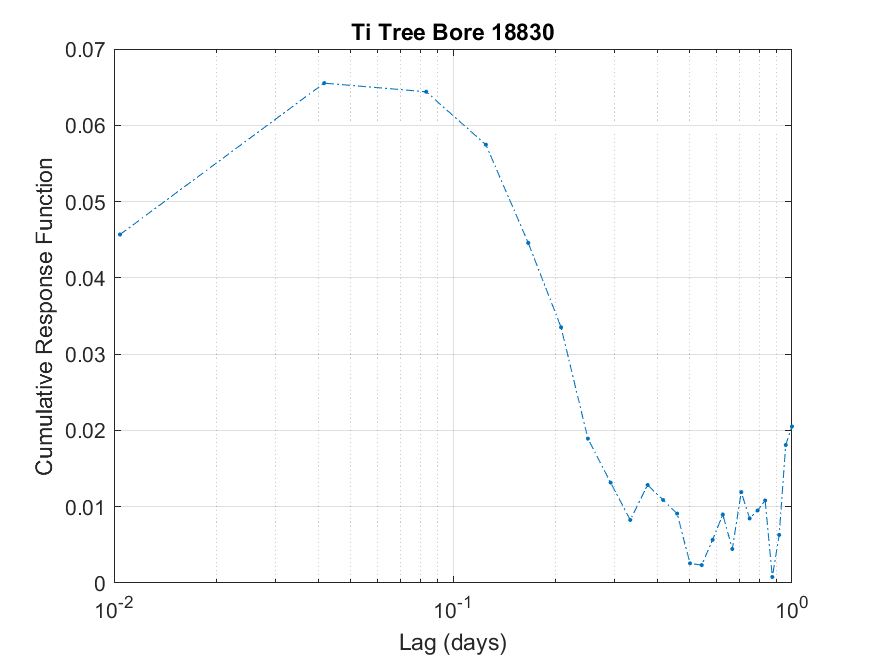

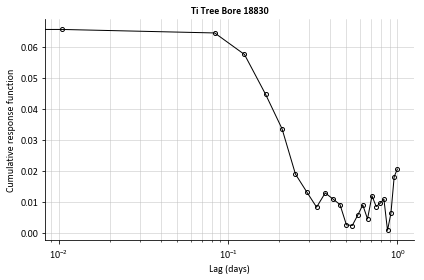

In [86]:
display(Image(filename='Matlab_files/titree1.png', width=450))
%matplotlib inline
f,s = plt.subplots()
lag = np.array([float(i) for i in lag])
lag[0] = 0.25
s.set_title('Ti Tree Bore '+name, fontsize=10, fontweight='bold')
plt.semilogx(np.array(lag)/24., crf, 'ko-', ms=4, mec='k', mfc='none', mew=1.)
s.set_xlabel('Lag (days)')
s.set_ylabel('Cumulative response function')
for i in ['top', 'right']:
    s.spines[i].set_visible(False)
s.grid(which='major', axis='both', c=(194./255., 194./255., 194./255.), ls='-', 
       lw=0.5)                            
s.grid(which='minor', axis='x', c=(194./255., 194./255., 194./255.), ls='-', 
       lw=0.5)                            
plt.tight_layout()
plt.savefig('Python_files/titree1.png', dpi=300)

2. Plot amplitude versus phase values for Earth tide components:

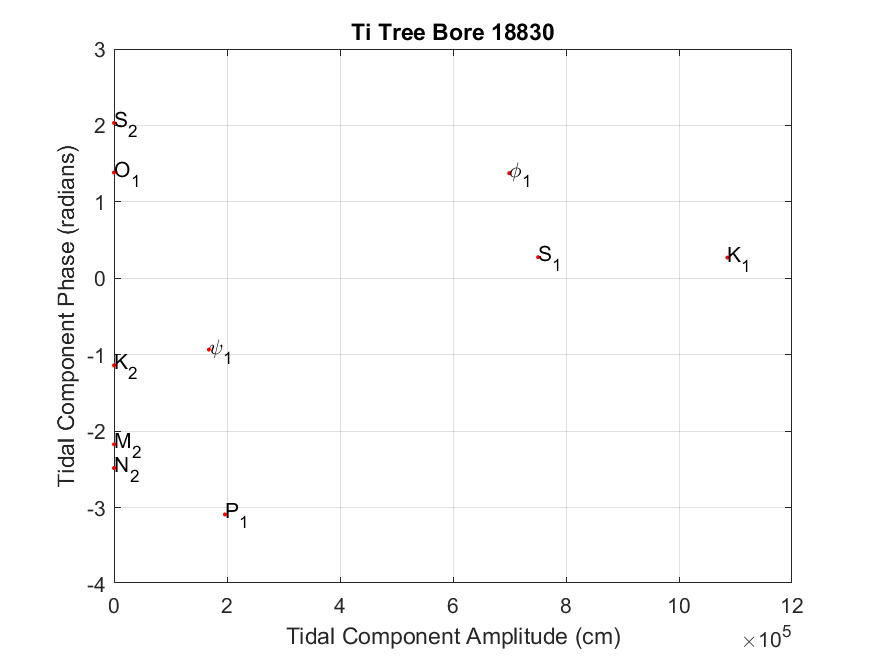

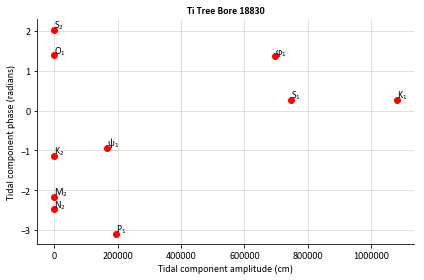

In [87]:
display(Image(filename='Matlab_files/titree2.png', width=450))
%matplotlib inline
f,s = plt.subplots()
s.set_title('Ti Tree Bore '+name, fontsize=10, fontweight='bold')
s.plot(mag, phase, 'ro')
s.set_xlabel('Tidal component amplitude (cm)')
s.set_ylabel('Tidal component phase (radians)')
for i in range(NP):
    s.text(mag[i]+5e-4, phase[i]+5e-2, tide[i])
for i in ['top', 'right']:
    s.spines[i].set_visible(False)
s.grid(which='major', axis='both', c=(194./255., 194./255., 194./255.), ls='-', 
       lw=0.5)                            
plt.tight_layout()
plt.savefig('Python_files/titree2.png', dpi=300)

3. Plot raw and detrended groundwater pressure data versus time:

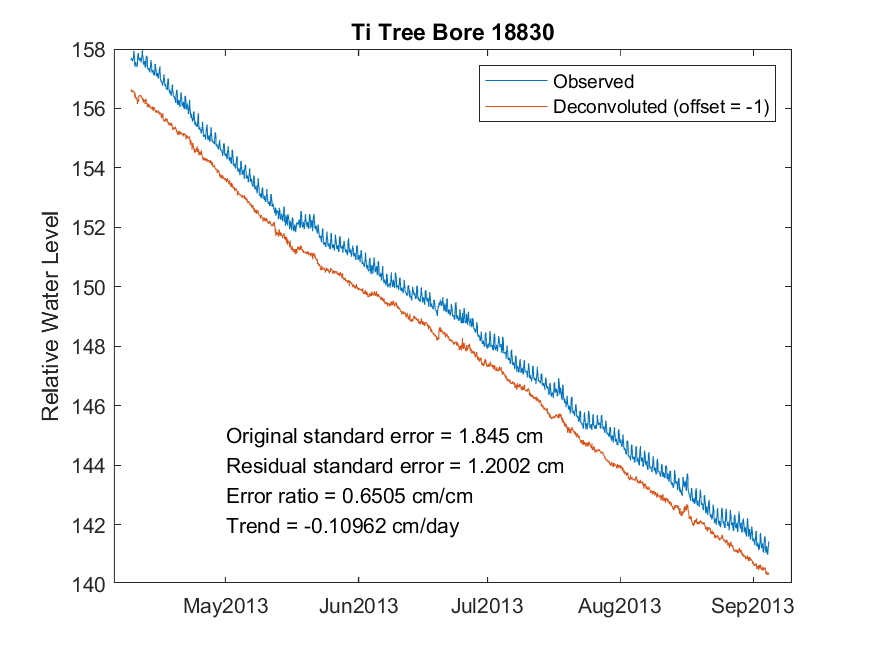

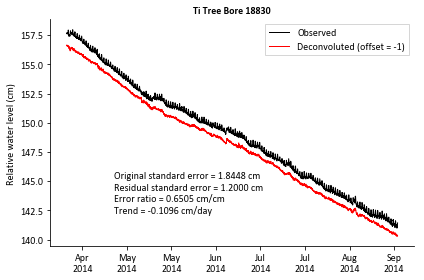

In [88]:
display(Image(filename='Matlab_files/titree3.png', width=450))
%matplotlib inline
f,s = plt.subplots()
s.set_title('Ti Tree Bore '+name, fontsize=10, fontweight='bold')
s.plot(t, y,     'k-', label='Observed')
s.plot(t, py-1., 'r-', label='Deconvoluted (offset = -1)')
s.set_ylabel('Relative water level (cm)')
s.legend(fancybox=False)
to = datetime(2014, 5, 1)
yo = 145.25 
s.text(to, yo,   'Original standard error = '+str('%.4f'% oerror)+' cm')
s.text(to, yo-1, 'Residual standard error = '+str('%.4f'% perror)+' cm')
s.text(to, yo-2, 'Error ratio = '+str('%.4f'% (perror/oerror))+' cm/cm')
s.text(to, yo-3, 'Trend = '+str('%.4f'% trend)+' cm/day')
s.xaxis.set_major_formatter(mpl.dates.DateFormatter('%b\n%Y'))
for i in ['top', 'right']:
    s.spines[i].set_visible(False)
plt.tight_layout()
plt.savefig('Python_files/titree3.png', dpi=300)